#Show base model

Load resnet model form pytorch model zoo

In [ ]:
from torchvision.models import resnet18
import os
import shutil

resnet_original = resnet18()
print(resnet_original)


# Helper method to run Tensorboard in Colab
def reinit_tensorboard(clear_log = True):
  # Directory for log files
  logs_base_dir = "runs"
  if clear_log:
    # Clear logs
    shutil.rmtree(logs_base_dir, ignore_errors = True)
    os.makedirs(logs_base_dir, exist_ok=True)
  # Colab magic
  %load_ext tensorboard
  %tensorboard --logdir {logs_base_dir}

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Show model structure
Do the same with your model when you create it.
Pay attention to spatial dimension of data in intermediate layers


In [ ]:
# Display model structure
# Do it for your model when

import torch
from torch.utils.tensorboard import SummaryWriter

reinit_tensorboard()
writer = SummaryWriter(comment = "resnet")

dummy_input = torch.randn([1,3,224,224])
writer.add_graph(resnet_original, dummy_input)
writer.flush()
writer.close()


# Load the dataset

Load and preprocess the data.
You can change size of datasets

In [ ]:
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader, random_split
import pickle

# https://github.com/facebookarchive/fb.resnet.torch/issues/180
cifar10_mean = (0.491, 0.482, 0.447)
cifar10_std = (0.247, 0.244, 0.262)


# Data preprocessing
transform=transforms.Compose([
                              transforms.ToTensor(), # PIL Image to Pytorch tensor
                              transforms.Normalize(cifar10_mean, cifar10_std) # https://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transforms%20normalize#torchvision.transforms.Normalize
                              ])

dataset = datasets.CIFAR10("content", train=True, transform = transform ,  download=True)

# Split dataset into train and val
train_ds, val_ds, _= random_split(dataset, [10000, 1000 ,39000])

with open("content/cifar-10-batches-py/batches.meta",'rb') as infile:
  cifar_meta = pickle.load(infile)
labels = cifar_meta['label_names']


# Validation function. Don't change this code

import torch.optim as optim
def validate(model,testloader,device):
  correct = 0
  total = 0
  with torch.no_grad():
    for images, labels in testloader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  return correct / total


# Code for training

Feel free to change hyperparameters.

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter

def train(model):
  writer = SummaryWriter(comment = "resnet")
  # Run model on cuda
  device = torch.device("cuda")

  model.train()
  model.to(device)

  train_loader = DataLoader(train_ds, batch_size = 128, shuffle = True)
  val_loader = DataLoader(val_ds, batch_size = 128, shuffle = False)

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.AdamW(model.parameters(), lr=0.01, weight_decay=1e-4)
  best_accuracy = 0

  for epoch in range(30):
    for img_batch, labels_batch in train_loader:
      optimizer.zero_grad()
      output = model(img_batch.to(device))
      loss = criterion(output, labels_batch.to(device))
      loss.backward()
      optimizer.step()
      images = img_batch.cpu()
      label_nums = output.cpu()
    accuracy = validate(model,val_loader,device)
    if best_accuracy < accuracy:
      best_accuracy = accuracy
    writer.add_scalar('Accuracy',accuracy,epoch)
    writer.add_scalar('Loss/train',loss.cpu().item(),epoch)
    print("Epoch {} Loss {:.2f} Accuracy {:.2f}".format(epoch,loss.item(),accuracy))
    writer.flush()
  writer.close()


# Main task

Create your ouwn resnet - like model with depth of 15 -25 layers

Look at original paper before coding : https://arxiv.org/pdf/1512.03385.pdf
Don't directly use code from here: https://github.com/pytorch/vision/blob/master/torchvision/models/resnet.py

Train and test it on CIFAR10, compare results with original model

In [ ]:
import torch.nn as nn
import torch
import torch.nn.functional as F

class CustomResnet(nn.Module):
    def __init__(self, class_nums = 10):
        super(CustomResnet, self).__init__()

        # Put your code here


    def forward(self, batch):
        # Put your code here

        return scores

class BasicBlock(nn.Module):
   def __init__(self): # You can add params here
        super(BasicBlock, self).__init__()

   def forward(self, x):
        # Put your code here
        return out


#Train your model



In [ ]:
custom_resnet = CustomResnet(10)
#reinit_tensorboard() # If need
train(custom_resnet)

#Train resnet18 from torchvision.models

  Train from scratch Resnet18 on CIFAR-10
  Compare results with yours and with results from original paper:


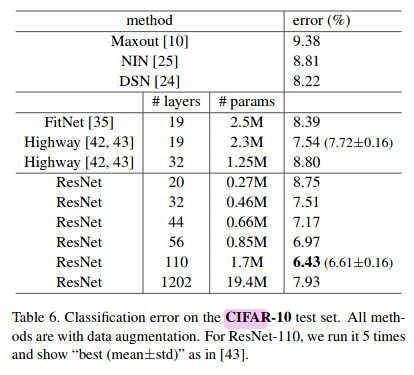

 https://arxiv.org/pdf/1512.03385.pdf

In [ ]:
reinit_tensorboard() # If need

# Put your code here


#Place for conclusion:

....